In [1]:
# https://medium.com/analytics-vidhya/house-price-prediction-regression-with-tensorflow-keras-4fc49fae7123
import pandas as pd

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)


2.1.0


In [3]:
!gdown --id 11djRVHNOWF1s4AX1SCwktHEEn--P_mAj

Downloading...
From: https://drive.google.com/uc?id=11djRVHNOWF1s4AX1SCwktHEEn--P_mAj
To: /home/fred/Disciplinas/Aprendizado de Máquina/ModuloIntermediario/Aula02-sourcecode/housing.csv
100%|██████████████████████████████████████| 1.42M/1.42M [00:00<00:00, 6.42MB/s]


In [11]:
raw_dataset = pd.read_csv('housing.csv').dropna()

dataset = raw_dataset.copy()
dataset.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


In [12]:
dataset.dropna(inplace=True)
dataset=dataset.drop('ocean_proximity', axis=1)
dataset.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [13]:
X = dataset.drop('median_house_value', axis=1)
y = dataset.median_house_value

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [37]:
model = keras.Sequential([
    layers.Dense(64, activation='sigmoid', input_shape=[X_train.shape[1]]),
    layers.Dense(1)
])


In [38]:
model.compile(loss='mse',
              optimizer='sgd',
              metrics=['mae', 'mse'])


In [39]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________


In [40]:
history = model.fit(
  X_train, y_train,
  epochs=100, validation_split = 0.2)

Train on 14711 samples, validate on 3678 samples
Epoch 1/100
14711/14711 [==============================] - 1s 84us/sample - loss: 13653506278.0537 - mae: 92253.7188 - mse: 13653506048.0000 - val_loss: 13348695287.7868 - val_mae: 88410.6406 - val_mse: 13348697088.0000
Epoch 2/100
14711/14711 [==============================] - 1s 57us/sample - loss: 13523334697.7299 - mae: 91867.5078 - mse: 13523335168.0000 - val_loss: 13450936936.4046 - val_mae: 88073.9375 - val_mse: 13450938368.0000
Epoch 3/100
14711/14711 [==============================] - 1s 57us/sample - loss: 13519127777.2508 - mae: 91786.1484 - mse: 13519120384.0000 - val_loss: 13428706779.5280 - val_mae: 93577.3438 - val_mse: 13428710400.0000
Epoch 4/100
14711/14711 [==============================] - 1s 57us/sample - loss: 13613809179.2514 - mae: 92193.0469 - mse: 13613811712.0000 - val_loss: 13362282175.8260 - val_mae: 92935.4453 - val_mse: 13362285568.0000
Epoch 5/100
14711/14711 [==============================] - 1s 57us/samp

KeyboardInterrupt: 

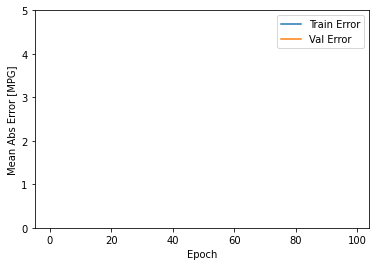

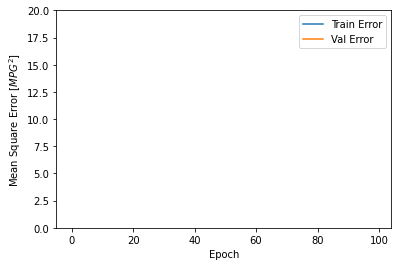

In [35]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
    plt.ylim([0,5])
    plt.legend()

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
    plt.ylim([0,20])
    plt.legend()
    plt.show()


plot_history(history)


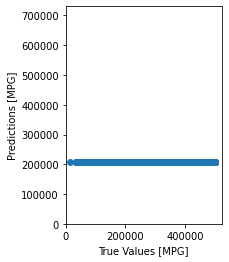

In [36]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
